## Use of Naive Bayes Therom

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\Desktop\Work\combined_emotion.csv")
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


1. First of all, we converted emotion into feature scaling using either Onehot encoding or Label encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()

df['Emotion_encoded'] = label_encoder.fit_transform(df['emotion'])
df.head()


,sentence,emotion,Emotion_encoded
0,i just feel really helpless and heavy hearted,fear,1
1,ive enjoyed being able to slouch about relax a...,sad,4
2,i gave up my internship with the dmrg and am f...,fear,1
3,i dont know i feel so lost,sad,4
4,i am a kindergarten teacher and i am thoroughl...,fear,1


In [9]:
emotion_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(emotion_mapping)

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sad', 5: 'suprise'}


2. Now we do Data Cleaning

In [10]:
df.drop(columns=['emotion'], inplace=True)

In [11]:
df.sample(10)

,sentence,Emotion_encoded
314819,i know it is ridiculous but those little thing...,3
93585,i love being a man even when i am in my most f...,2
349059,i feel paranoid and try to control the group etc,1
107189,i feel so delighted i will finally post a pict...,2
402282,i dont have the confidence in myself to believ...,0
249094,im really not feeling that affectionate toward...,3
139190,i feel like there have been a ton of lil highl...,3
378507,i feel very happy like this in a compartment b...,2
186819,i left our little coffee date feeling so inspi...,2
206856,i say no i feel guilty how to cope using the s...,4


3. Split data for traning and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['Emotion_encoded'], test_size=0.2)

In [16]:
#Create model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model

MultinomialNB()

We have split the data but we cannot fit this data to Model, becasue Machine cannot understand word so we convert this word to number for that we have many techniques, but I am using CountVectorizer. Like belowe img: 

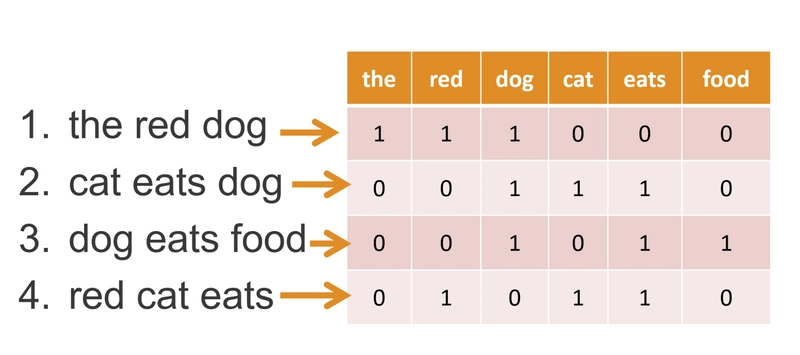

In [15]:
from IPython.display import Image

# Display an image
Image(r"C:\Users\DELL\Desktop\CountVectorizationimg.jpg")

4. Convert Text using Sklearn Pipeline / Count Vectorizer

FIRST TYPE : USING COUNT VECTORIZER

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_vectorized = v.fit_transform(X_train)
X_test_vectorized = v.transform(X_test)

In [27]:
model.fit(X_train_vectorized,y_train)

MultinomialNB()

In [29]:
model.score(X_test_vectorized,y_test)

0.8607806031933767

In [28]:
sentence = ["I am feeling great!", "I am so sad today", "I fear this might happen", "I love this movie"]

model.predict(v.transform(sentence))

array([2, 4, 1, 2])

In this above technqiues, we have to each time transform word to number using CountVectorizer objects. So solve this problem, I prefer Second type means Sklearn Pipeline.

SECOND TYPE: USING SKLEARN PIPELINE 

In [22]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [23]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [24]:
clf.score(X_test, y_test)

0.8607806031933767

Both gave same prediction score.

In [26]:
sentence = ["I am feeling great!", "I am so sad today", "I fear this might happen", "I love this movie"]

clf.predict(sentence)

array([2, 4, 1, 2])

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sad', 5: 'suprise'}

This below show when to use particular theorem for different type of datasets.

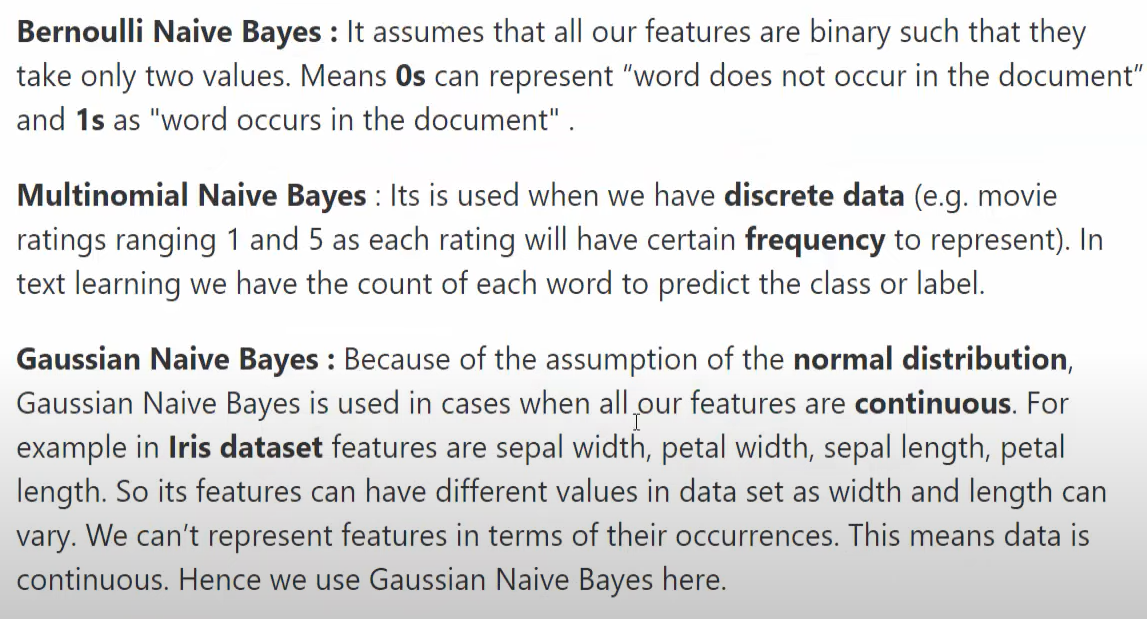